In [1]:
#in questo notebook faccio LMM e t-test (sia parametrico che non) per vedere l'impatto delle mie VI sulla VD = CoinGainedPerTrialMean (i.e., media del numero di monete raccolte per trial)

In [2]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.optimize as opt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from copy import deepcopy

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [4]:
data = pd.read_csv('out/results.csv')  # read data

In [5]:
import statsmodels
endog = data["CoinGainedPerBoxPerTrialMean"] # variabile dipendente
exog = data[["LongBattery","RichEnvironment","FirstAreaRich"]] # variabili indipendenti


groups = data['Subject'] # nel modello lineare misto devo mettere il gruppo
model = statsmodels.regression.mixed_linear_model.MixedLM(endog, exog, groups)
result = model.fit()
print(result.summary())

formula = "CoinGainedPerBoxPerTrialMean ~  LongBattery * FirstAreaRich + LongBattery * RichEnvironment + RichEnvironment * FirstAreaRich" 


model = smf.mixedlm(formula, data=data, groups = data['Subject'])

result = model.fit()
print(result.summary())

                  Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: CoinGainedPerBoxPerTrialMean
No. Observations: 1280    Method:             REML                        
No. Groups:       32      Scale:              0.1722                      
Min. group size:  40      Log-Likelihood:     -842.1163                   
Max. group size:  40      Converged:          Yes                         
Mean group size:  40.0                                                    
-----------------------------------------------------------------------------
                   Coef.     Std.Err.       z       P>|z|    [0.025    0.975]
-----------------------------------------------------------------------------
LongBattery        -0.448       0.023    -19.325    0.000    -0.494    -0.403
RichEnvironment     0.855       0.028     30.857    0.000     0.801     0.910
FirstAreaRich       0.282       0.033      8.597    0.000     0.217     0.346
Group Var          36.960 

In [6]:
condizione_11 = (data["LongBattery"] == True) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data11 = data [condizione_11]

condizione_12 = (data["LongBattery"] == True) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data12 = data [condizione_12]

condizione_13 = (data["LongBattery"] == False) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data13 = data [condizione_13]

condizione_14 = (data["LongBattery"] == False) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data14 = data [condizione_14]



coins_gained_per_trial_mean_11 = data11["CoinGainedPerBoxPerTrialMean"] 
coins_gained_per_trial_mean_11  = coins_gained_per_trial_mean_11 .to_numpy() 

coins_gained_per_trial_mean_12 = data12["CoinGainedPerBoxPerTrialMean"] 
coins_gained_per_trial_mean_12 = coins_gained_per_trial_mean_12.to_numpy() 

coins_gained_per_trial_mean_13 = data13["CoinGainedPerBoxPerTrialMean"] 
coins_gained_per_trial_mean_13 = coins_gained_per_trial_mean_13.to_numpy()

coins_gained_per_trial_mean_14 = data14["CoinGainedPerBoxPerTrialMean"]
coins_gained_per_trial_mean_14 = coins_gained_per_trial_mean_14.to_numpy() 


In [7]:
# a seguire faccio il t-test

import scipy.stats as stats

# t-test delle condizioni in cui la batteria è lunga
t_stat, p_value = stats.ttest_ind(coins_gained_per_trial_mean_11, coins_gained_per_trial_mean_12)
print("t-test a campioni indipendenti sulle condizioni con la batteria lunga:", t_stat, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")



# t-test delle condizioni in cui la batteria è corta
t_stat, p_value = stats.ttest_ind(coins_gained_per_trial_mean_13, coins_gained_per_trial_mean_14)
print("t-test a campioni indipendenti sulle condizioni con la batteria corta:", t_stat, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")

t-test a campioni indipendenti sulle condizioni con la batteria lunga: 26.40034603430505 3.3976223439929804e-96
Differenza significativa
t-test a campioni indipendenti sulle condizioni con la batteria corta: 18.22718679392213 7.5473538999129e-57
Differenza significativa


In [8]:
import scipy.stats as stats


statistic, p_value = stats.mannwhitneyu(coins_gained_per_trial_mean_11, coins_gained_per_trial_mean_12, use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False)
print("t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria lunga:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")



statistic, p_value = stats.mannwhitneyu(coins_gained_per_trial_mean_13, coins_gained_per_trial_mean_14, use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False)
print("t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria corta:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")

t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria lunga: 53427.0 5.121660810844666e-63
Differenza significativa
t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria corta: 46308.0 7.318327075303379e-43
Differenza significativa


In [9]:
# Perform Mann-Whitney U test and store results
results = []
statistic, p_value = stats.mannwhitneyu(coins_gained_per_trial_mean_11, coins_gained_per_trial_mean_12, use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False)
results.append(["Long battery conditions", statistic, p_value, "Significant difference" if p_value < 0.05 else "Non significant difference"])

statistic, p_value = stats.mannwhitneyu(coins_gained_per_trial_mean_13, coins_gained_per_trial_mean_14, use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False)
results.append(["Short battery conditions", statistic, p_value, "Significant difference" if p_value < 0.05 else "Non significant difference"])

# Create a DataFrame to store the results
columns = ["Test", "Statistic", "P-Value", "Significance"]
results_df = pd.DataFrame(results, columns=columns)

# Save the results to a CSV file
results_df.to_csv('CoinGainedPerBoxPerTrialMean_mannwhitneyresult.csv', index=False)

print("Results saved to 'CoinGainedPerBoxPerTrialMean_mannwhitneyresult.csv'.")
print(results)

Results saved to 'CoinGainedPerBoxPerTrialMean_mannwhitneyresult.csv'.
[['Long battery conditions', 53427.0, 5.121660810844666e-63, 'Significant difference'], ['Short battery conditions', 46308.0, 7.318327075303379e-43, 'Significant difference']]


Text(0.5, 1.0, 'Short battery')

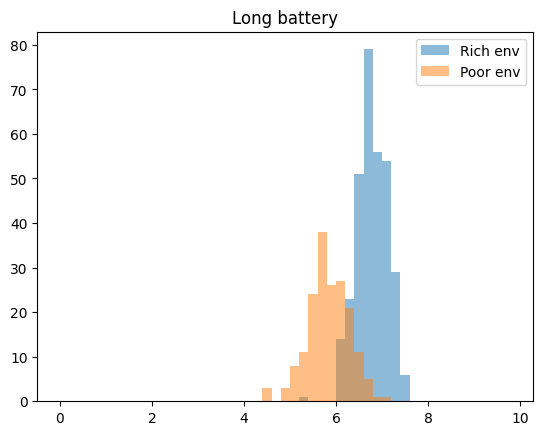

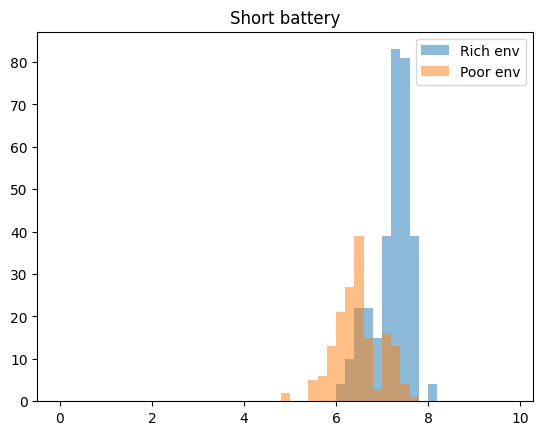

In [10]:
# NB: il p-value è estremamente piccolo, per vedere se ha senso plotto le figure - spoiler: ha senso, le distribuzioni sono tanto diverse
plt.figure()
plt.hist(coins_gained_per_trial_mean_11,np.arange(0,10,0.2), alpha = 0.5)
plt.hist(coins_gained_per_trial_mean_12,np.arange(0,10,0.2), alpha = 0.5)
plt.legend(['Rich env','Poor env'])
plt.title('Long battery')

plt.figure()
plt.hist(coins_gained_per_trial_mean_13,np.arange(0,10,0.2), alpha = 0.5)
plt.hist(coins_gained_per_trial_mean_14,np.arange(0,10,0.2), alpha = 0.5)
plt.legend(['Rich env','Poor env'])
plt.title('Short battery')

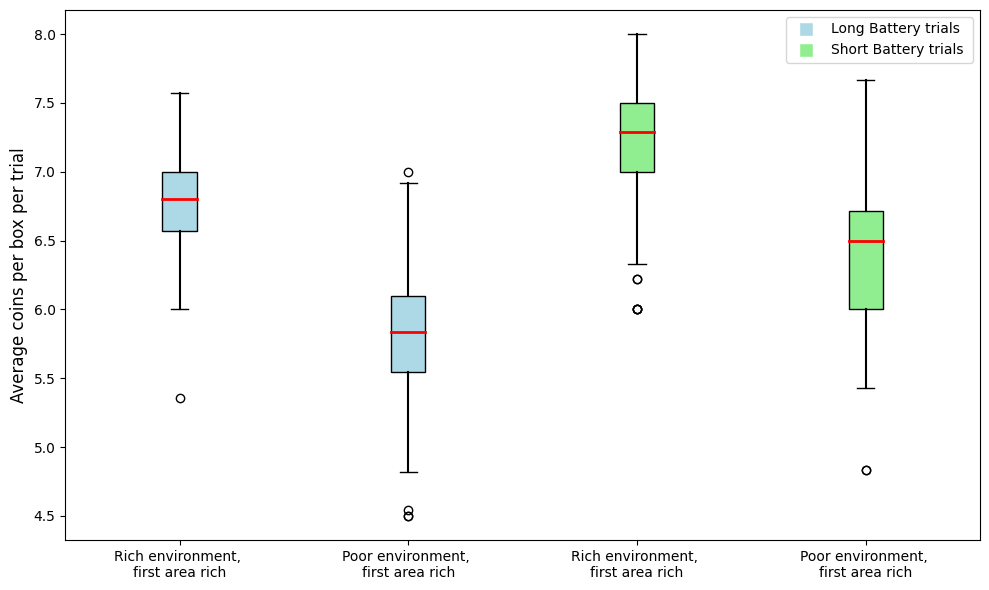

In [16]:
import matplotlib.pyplot as plt

data_long_battery = [coins_gained_per_trial_mean_11, coins_gained_per_trial_mean_12]
data_short_battery = [coins_gained_per_trial_mean_13, coins_gained_per_trial_mean_14]

# Combine data for Long Battery and Short Battery
data = data_long_battery + data_short_battery

# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Box plot for Long Battery in blue
box_long_battery = ax.boxplot(data_long_battery, positions=[1, 2],
                              labels=[
                                "Rich environment, \nfirst area rich",
                                "Poor environment, \nfirst area rich",
                              ], patch_artist=True)

# Customize the box plot for Long Battery
colors_long_battery = ['lightblue', 'lightblue']
for patch, color in zip(box_long_battery['boxes'], colors_long_battery):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in box_long_battery['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.5)
for median in box_long_battery['medians']:
    median.set(color='red', linewidth=2)

# Box plot for Short Battery in green
box_short_battery = ax.boxplot(data_short_battery, positions=[3, 4],
                               labels=[
                                "Rich environment, \nfirst area rich",
                                "Poor environment, \nfirst area rich",
                               ], patch_artist=True)

# Customize the box plot for Short Battery
colors_short_battery = ['lightgreen', 'lightgreen']
for patch, color in zip(box_short_battery['boxes'], colors_short_battery):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
for whisker in box_short_battery['whiskers']:
    whisker.set(color='black', linestyle='-', linewidth=1.5)
for median in box_short_battery['medians']:
    median.set(color='red', linewidth=2)

# Set title and labels
ax.set_ylabel('Average coins per box per trial', fontsize=12)
ax.tick_params(axis='both', labelsize=10)

# Add legend
legend_labels = ['Long Battery trials ', 'Short Battery trials ']
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in
                  ['lightblue', 'lightgreen']]

ax.legend(legend_handles, legend_labels, loc='upper right')

# Tight layout
plt.tight_layout()
plt.show()
